In [21]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import os

from gp_videos import sample_video
%load_ext autoreload
%autoreload 2
# We need: 
# 5 x 2s video (30 fps, 36 x 36 pixels) for each T and L 
# T : [0.5, 1, 2, 4, 8, 16, 32] frames 
# L : [0.5, 1, 2, 4, 8, 16, 32] pixels

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
sample_video(1,1,36,36,20)

array([[[-2.2719551 , -0.71790479, -0.72218394, ...,  0.6914106 ,
          1.46338362,  1.23456103],
        [-1.23170378, -0.17756433, -0.10651546, ...,  0.43268034,
          0.76543941, -0.07986334],
        [ 0.46374852, -0.03617473, -0.51926303, ..., -0.12368384,
         -0.85324907, -1.64694531],
        ...,
        [ 1.61676968,  0.81479829,  0.77857762, ...,  0.19643236,
         -0.76229656, -0.06964623],
        [ 0.87086183,  1.12035787,  1.14524274, ...,  0.23869681,
          0.45624553,  0.64563404],
        [-0.62027906, -0.75560048, -0.02719361, ...,  0.57180191,
          0.32820688, -0.19244407]],

       [[-0.8002633 ,  0.09063273,  0.40743443, ...,  0.91000699,
          2.05260565,  1.6566952 ],
        [-0.55671758,  0.35742596,  0.02613185, ...,  0.20244555,
          1.08333131,  0.51790189],
        [ 1.6176305 ,  1.07010823, -0.15806189, ..., -0.10955741,
         -0.36886387, -0.1238038 ],
        ...,
        [ 0.7686736 ,  0.3174131 ,  0.38193467, ..., -

In [23]:
results_dir = 'results/23042024_2358/'


N_x = 20
N_y = 20
N_t = 15 
Ls = [0.5,1,2,4,8,16,32]
N_L = len(Ls)
Ts = [0.5,1,2,4,8,16,32]
N_T = len(Ts)
ids = [0,1,2,3,4,16,32]
N_it = len(ids)

data_array = np.zeros((N_x, N_y, N_t, N_it, N_L, N_T))

# Load the results from the first file
for filename in os.listdir(results_dir):
    if filename.endswith('.npz'):
        results = np.load(results_dir + filename, allow_pickle=True)
        R = results['results']
        L_idx = results['L_idx']
        T_idx = results['T_idx']
        id = results['id']
        data_array[:,:,:,id,L_idx,T_idx] = R

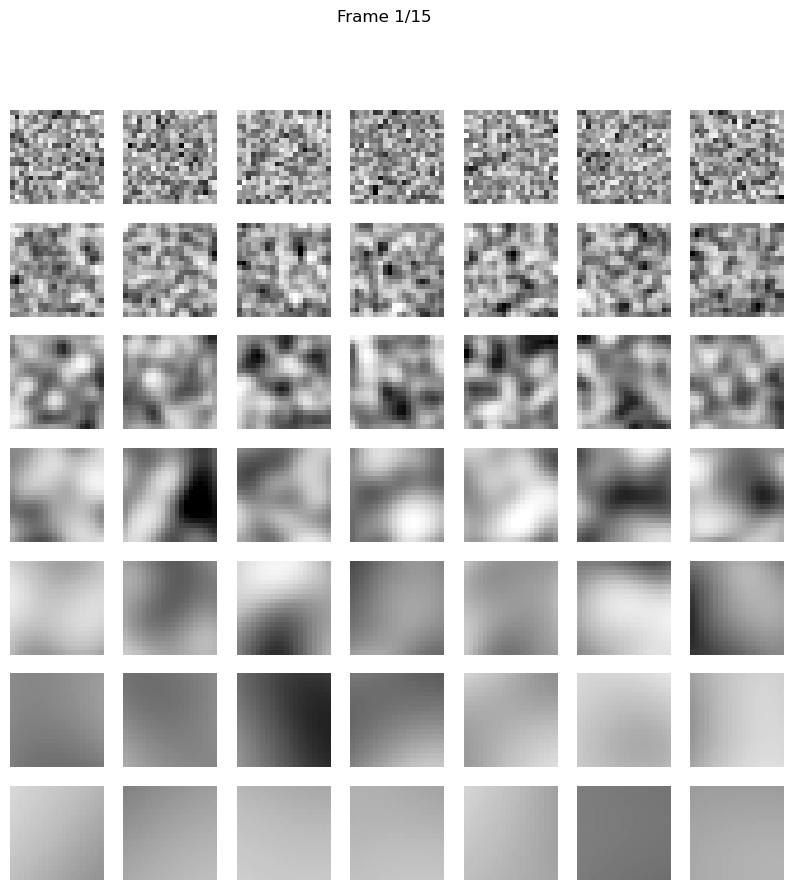

In [26]:
# Function to update the plot for each frame
def update(frame):
    fig = plt.gcf()  # Get the current figure
    #ax = fig.gca()  # Get the current axis
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            ax[i,j].cla()
            ax[i,j].set_aspect('equal')
            ax[i,j].axis('off')
            ax[i,j].imshow(data_array[:,:,frame,0,i,j], cmap='Greys',vmin=-3,vmax=3)
    fig.suptitle(f'Frame {frame+1}/{N_t}')
# Initialize the figure
fig, ax = plt.subplots(N_L,N_T,figsize=(10,10))

# Create the animation
anim = FuncAnimation(fig, update, frames=N_t, interval=1000/30)

# Show the animation using HTML
from IPython.display import HTML
HTML(anim.to_html5_video())